In [18]:
# NIGERIAN INFLATION DASHBOARD 
import pandas as pd

# Load my file
df = pd.read_excel('data raw/Inflation_Data_in_Excel.xlsx')

# Rename the 11 columns correctly
df.columns = [
    'Year', 'Month', 'Period',
    'All_Items_YoY', 'All_Items_12M_Avg',
    'Food_YoY', 'Food_12M_Avg',
    'Core_YoY', 'Core_12M_Avg',
    'Energy_Excluded_YoY', 'Energy_Excluded_12M_Avg'
]

# Reverse order (oldest first)
df = df.iloc[::-1].reset_index(drop=True)

# Month is numeric (1-12), Year is number → create proper date
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Set date as index and drop old columns
df = df.set_index('Date').drop(columns=['Year', 'Month', 'Period'])

# DONE
print(f"From {df.index[0]:%B %Y} → {df.index[-1]:%B %Y}")
print("\nLatest 6 months:")
print(df[['All_Items_YoY', 'Food_YoY', 'Core_YoY']].tail(6))

From January 2003 → October 2025

Latest 6 months:
            All_Items_YoY  Food_YoY  Core_YoY
Date                                         
2025-05-01          22.97     21.14     23.28
2025-06-01          22.22     21.97     22.43
2025-07-01          21.88     22.74     21.38
2025-08-01          20.12     21.87     20.10
2025-09-01          18.02     16.87     19.10
2025-10-01          16.05     13.12     18.12


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

# Nigerian flag colours
ng_green   = "#006633"
ng_white   = "#FFFFFF"
food_orange = "#E65F00"
core_purple = "#702AF5"

In [22]:
df = pd.read_excel('data raw/Inflation_Data_in_Excel.xlsx')

df.columns = [
    'Year', 'Month', 'Period',
    'All_Items_YoY', 'All_Items_12M_Avg',
    'Food_YoY', 'Food_12M_Avg',
    'Core_YoY', 'Core_12M_Avg',
    'Energy_Excluded_YoY', 'Energy_Excluded_12M_Avg'
]

df = df.iloc[::-1].reset_index(drop=True)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
df = df.set_index('Date').drop(columns=['Year', 'Month', 'Period'])

print("Data loaded perfectly ready for the dashboard!")

Data loaded perfectly ready for the dashboard!


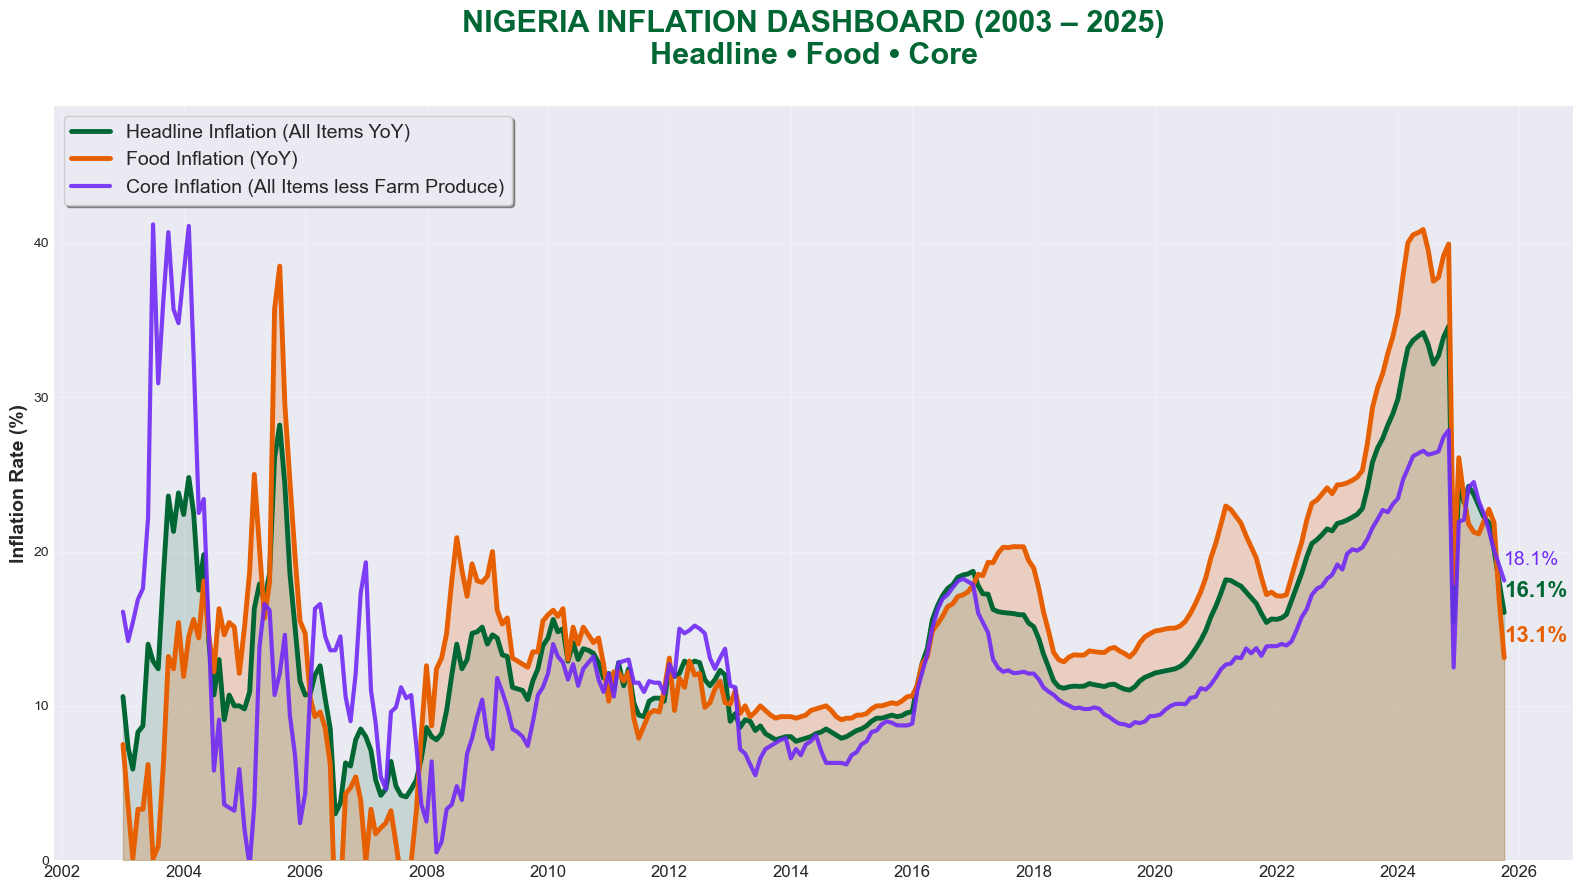

In [23]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(df.index, df['All_Items_YoY'], label='Headline Inflation (All Items YoY)', linewidth=3.5, color=ng_green)
ax.plot(df.index, df['Food_YoY'], label='Food Inflation (YoY)', linewidth=3.5, color=food_orange)
ax.plot(df.index, df['Core_YoY'], label='Core Inflation (All Items less Farm Produce)', linewidth=3, color=core_purple, alpha=0.9)

ax.fill_between(df.index, df['All_Items_YoY'], alpha=0.15, color=ng_green)
ax.fill_between(df.index, df['Food_YoY'], alpha=0.2, color=food_orange)

# Latest values
latest = df.iloc[-1]
ax.text(df.index[-1], latest['All_Items_YoY']+1, f"{latest['All_Items_YoY']:.1f}%", fontsize=16, fontweight='bold', color=ng_green)
ax.text(df.index[-1], latest['Food_YoY']+1, f"{latest['Food_YoY']:.1f}%", fontsize=16, fontweight='bold', color=food_orange)
ax.text(df.index[-1], latest['Core_YoY']+1, f"{latest['Core_YoY']:.1f}%", fontsize=14, color=core_purple)

ax.set_title('NIGERIA INFLATION DASHBOARD (2003 – 2025)\nHeadline • Food • Core', 
             fontsize=22, fontweight='bold', pad=30, color=ng_green)
ax.set_ylabel('Inflation Rate (%)', fontsize=14, fontweight='bold')
ax.set_ylim(0, df[['All_Items_YoY', 'Food_YoY']].max().max() + 8)

ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0, fontsize=12)

ax.legend(fontsize=14, loc='upper left', frameon=True, fancybox=True, shadow=True)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

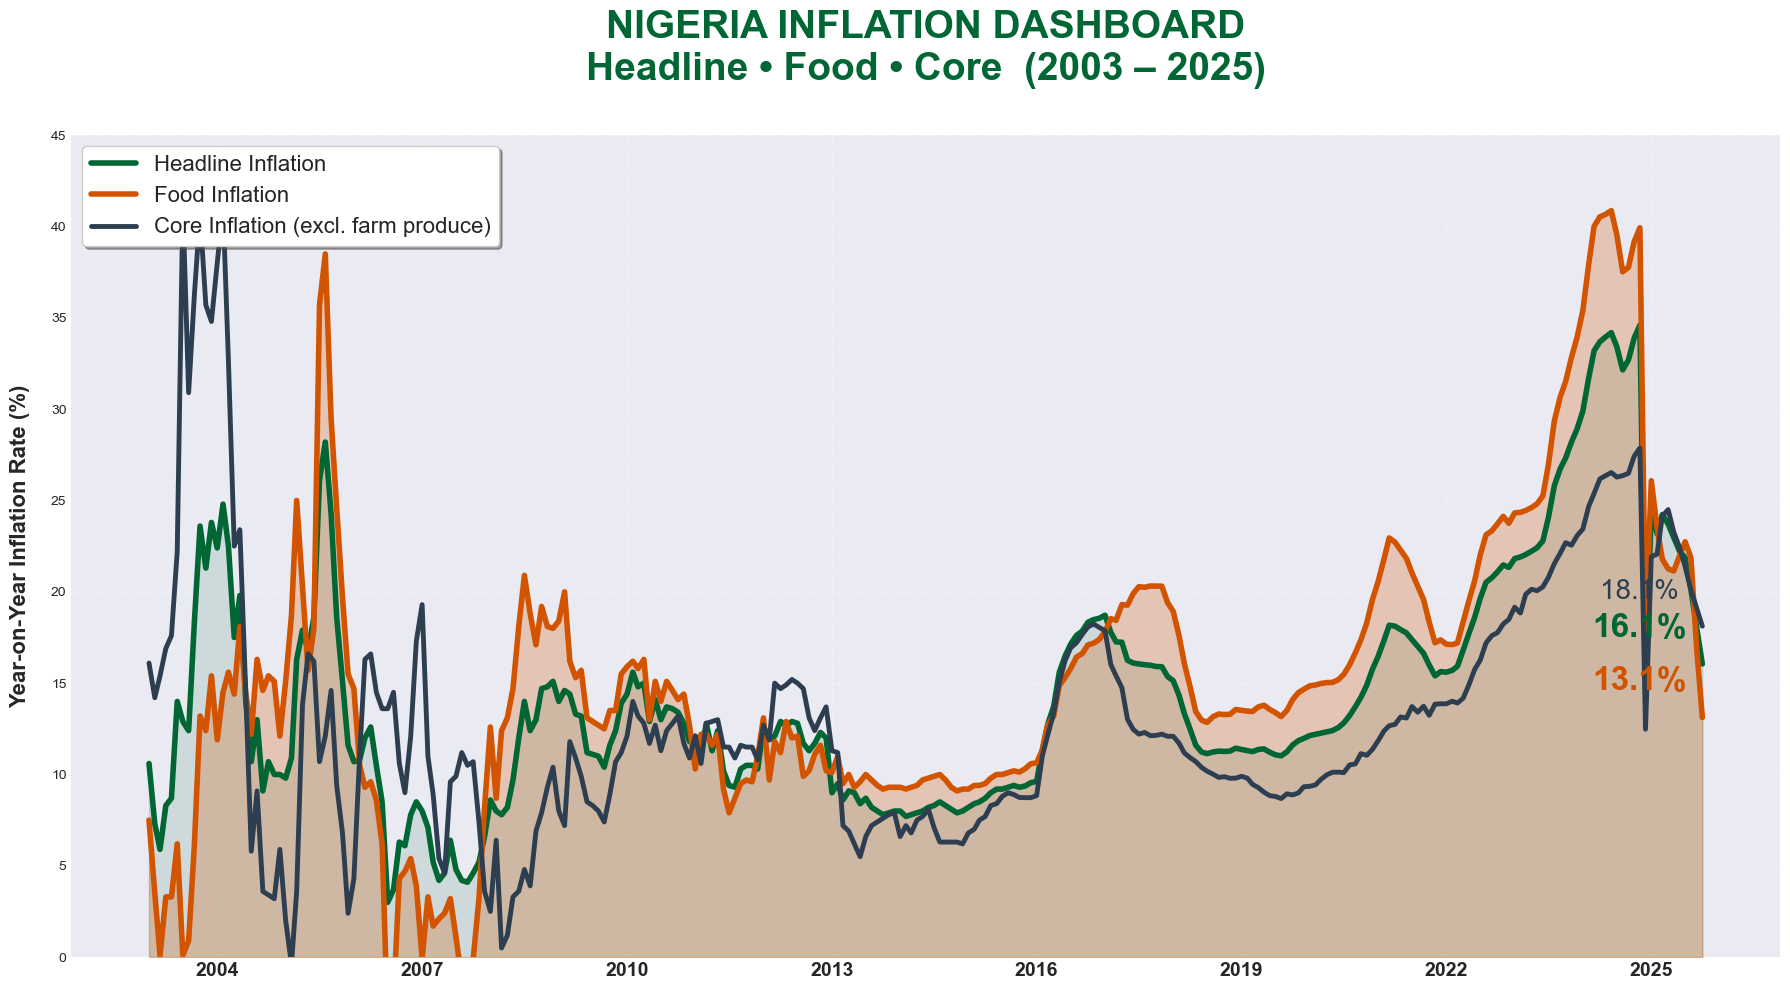

In [24]:
#ANOTHER VERSION 
fig, ax = plt.subplots(figsize=(18, 10), facecolor='white')

# Lines
ax.plot(df.index, df['All_Items_YoY'], label='Headline Inflation', linewidth=4, color='#006633')
ax.plot(df.index, df['Food_YoY'], label='Food Inflation', linewidth=4, color='#D35400')
ax.plot(df.index, df['Core_YoY'], label='Core Inflation (excl. farm produce)', linewidth=3.5, color='#2C3E50')

# Shaded areas
ax.fill_between(df.index, df['All_Items_YoY'], alpha=0.12, color='#006633')
ax.fill_between(df.index, df['Food_YoY'], alpha=0.25, color='#D35400')

# Latest values on the right
latest = df.iloc[-1]
ax.text(df.index[-12], latest['All_Items_YoY'] + 1.5, f"{latest['All_Items_YoY']:.1f}%", 
        fontsize=24, fontweight='bold', color='#006633', ha='center')
ax.text(df.index[-12], latest['Food_YoY'] + 1.5, f"{latest['Food_YoY']:.1f}%", 
        fontsize=24, fontweight='bold', color='#D35400', ha='center')
ax.text(df.index[-12], latest['Core_YoY'] + 1.5, f"{latest['Core_YoY']:.1f}%", 
        fontsize=20, color='#2C3E50', ha='center')

# Titles & labels
ax.set_title('NIGERIA INFLATION DASHBOARD\nHeadline • Food • Core  (2003 – 2025)', 
             fontsize=28, fontweight='bold', pad=40, color='#006633')
ax.set_ylabel('Year-on-Year Inflation Rate (%)', fontsize=16, fontweight='bold', labelpad=15)
ax.set_ylim(0, 45)

# X-axis
ax.xaxis.set_major_locator(mdates.YearLocator(3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(fontsize=14, fontweight='bold')

# Legend & grid
ax.legend(fontsize=16, loc='upper left', frameon=True, fancybox=True, shadow=True, facecolor='white')
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()